# Customer Success Associate

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Examen/data.csv", delimiter = ";", decimal = ".", encoding ="utf-8")
df.columns= ['date', "unity", 'service', 'sence', 'period', 'sp','so','distance', 'icf']

In [3]:
df.head(10)

,date,unity,service,sence,period,sp,so,distance,icf
0,01-08-2019,U2,201,IDA,001 - Pre Nocturno Madrugada,3,3,32.12,1.00
1,01-08-2019,U2,201,IDA,002 - Nocturno,11,11,32.12,1.00
2,01-08-2019,U2,201,IDA,003 - Transición Nocturno,10,11,32.12,1.00
3,01-08-2019,U2,201,IDA,004 - Punta Mañana,20,19,32.12,0.95
4,01-08-2019,U2,201,IDA,005 - Transición Punta mañana,8,8,32.12,1.00
5,01-08-2019,U2,201,IDA,006 - Fuera Punta Mañana,24,24,32.12,1.00
6,01-08-2019,U2,201,IDA,008 - Fuera de Punta Tarde,28,28,32.12,1.00
7,01-08-2019,U2,201,IDA,009 - Punta Tarde,27,20,32.12,0.74
8,01-08-2019,U2,201,IDA,010 - Transición Punta Tarde,8,10,32.12,1.00
9,01-08-2019,U2,201,IDA,011 - Fuera de Punta Nocturno,9,11,32.12,1.00


## Análisis de relación entre ICF con la distancia de los recorridos por empresa

In [4]:
df1 = df.loc[:, ['unity', 'distance', 'icf']]

In [5]:
df1.head(8)

,unity,distance,icf
0,U2,32.12,1.00
1,U2,32.12,1.00
2,U2,32.12,1.00
3,U2,32.12,0.95
4,U2,32.12,1.00
5,U2,32.12,1.00
6,U2,32.12,1.00
7,U2,32.12,0.74


In [6]:
df1.groupby("unity").describe()

distance                                                         \
          count       mean        std  min    25%    50%    75%    max   
unity                                                                    
U2      70202.0  20.819752   7.921329  0.0  14.16  20.72  27.71  37.33   
U3     119206.0  14.774757   6.745171  0.0   9.74  13.48  19.21  41.68   
U4      73737.0  23.032330   9.634775  0.0  15.00  21.49  33.58  38.86   
U5      66009.0  23.120578  10.450650  0.0  14.37  23.76  31.06  57.22   
U6      79625.0  13.279561   5.199412  0.0   9.00  12.51  16.30  31.26   
U7      46068.0  16.830905   8.504966  0.0  10.41  15.28  20.86  49.38   

            icf                                                
          count      mean       std  min   25%  50%  75%  max  
unity                                                          
U2      70202.0  0.956555  0.087675  0.0  0.94  1.0  1.0  1.0  
U3     119206.0  0.981153  0.054326  0.0  1.00  1.0  1.0  1.0  
U4      73737.0  0.963948  0.092913  0.0  1.00  1.0  1.0  1.0  
U5      66009.0  0.992560  0.036843  0.0  1.00  1.0  1.0  1.0  
U6      79625.0  0.979488  0.057072  0.0  1.00  1.0  1.0  1.0  
U7      46068.0  0.994377  0.035263  0.0  1.00  1.0  1.0  1.0

### U2 SUBUS

In [148]:
x1 = df_U2_group['icf'].values.reshape(-1,1)
y1 = df_U2_group['distance'].values.reshape(-1,1)

In [109]:
is_U2 = df.loc[:, 'unity'] == 'U2'
df_U2 = df.loc[is_U2]
df_U2_group = df_U2.groupby(['service']).mean()
df_U2_group

,sp,so,distance,icf
service,,,,
201,15.045223,15.076314,32.623103,0.975184
201e,16.245381,17.509978,21.979172,0.963673
201ey,3.000000,3.055556,21.400000,0.981667
202c,18.554859,18.347962,11.962571,0.950408
203,21.394302,20.082621,29.707675,0.907789
203e,20.146032,18.517460,21.805048,0.918254
204,19.713499,19.579890,19.251494,0.929139
204N,6.714697,6.541787,21.710893,0.970259
204e,9.231579,8.976316,19.380921,0.939842


In [ ]:
df_U2_group.groupby()

In [149]:
mod = linear_model.LinearRegression()

In [150]:
mod.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
mod.coef_

array([[-141.74703034]])

In [152]:
mod.intercept_

array([156.08574171])

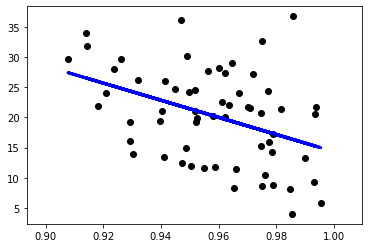

In [154]:
plt.scatter(x1,y1, color= 'black')
plt.plot(x1, mod.predict(x1), color = 'blue', linewidth=3)
plt.show()

In [157]:
r2_score(y1, mod.predict(x1))

0.16396995681367876